In [3]:
#importing libraries

import pandas as pd              # pandas for dataset manipulation
import matplotlib.pyplot as plt  # matplotlib for graphical plots
import numpy as np               # numpy for array 

# import jtplot module in notebook
from jupyterthemes import jtplot
jtplot.style()

In [4]:
data = pd.read_csv("ex1data1.txt") # reading comma separated data

df = pd.DataFrame(data)            # creating a DataFrame
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

m = len(x)

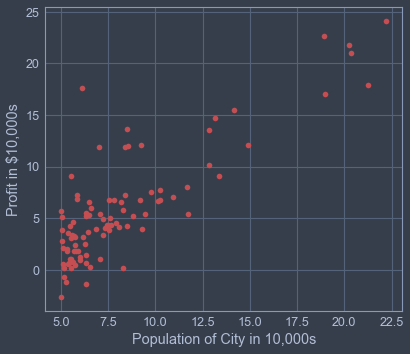

In [5]:
# Visualizing the dataset
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(x, y, "ro")

In [7]:
# array of [ones, x] of shape (m, 2)
X = np.c_[np.ones(m, dtype=np.float64), np.array(x, dtype=np.float64)] 

theta = np.zeros((2, 1)) # intialize theta at [[0], [0]]
iterations = 1500
alpha = 0.01             # learning rate
cost_history = []
theta_vals = np.c_[np.ones((iterations, 2), dtype=np.float64)]

In [8]:
#Calculating the cost function 
def computeCost(X, y, theta):
    cost = 0
    for (i, row) in enumerate(X):
        h = np.transpose(theta) @ row          # hypothesis
        cost = cost + np.square(h-y[i])/(2*m)
        
    return cost

In [9]:
computeCost(X, y, theta)  # compute cost for theta at [[0], [0]]

array([32.07273388])

In [10]:
def gradientDescent(X, y, theta, alpha, iterations):
    
    for iters in range(iterations):
        
        # storing theta values
        theta_vals[iters] = np.transpose(theta)
        
        # storing cost for different values of theta
        cost_history.append(computeCost(X, y, theta))
        
        # calculating the gradient
        temp1 = theta[0] - alpha * (np.sum([((np.transpose(theta) @ row) - y[i]) for (i, row) in enumerate(X)]) / m)
        temp2 = theta[1] - alpha * (np.sum([((np.transpose(theta) @ row) - y[i]) * row for (i, row) in enumerate(X)]) / m)
        
        # Simultaneous update
        theta[0] = temp1
        theta[1] = temp2
    
    return theta

In [11]:
# final theta value for minimum cost
theta = gradientDescent(X, y, theta, alpha, iterations) 

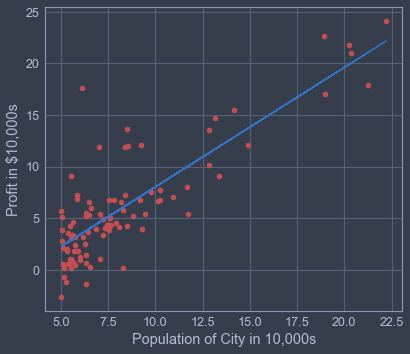

In [12]:
# Plotting linear regression
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(x, y, "ro")
plt.plot(X[:, 1], X @ theta, 'b-') # regression line

In [ ]:
# DONE!!!!!!!!!!!